<a href="https://colab.research.google.com/github/ecemozturkk/TensorFlow-Colab-Notes/blob/main/00_tensorflow_fundamentals.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**00 Getting started with TensorFlow: A guide to the fundamentals**

##**What we're going to cover**

TensorFlow is vast. But the main premise is simple: turn data into numbers (tensors) and build machine learning algorithms to find patterns in them.

In this notebook we cover some of the most fundamental TensorFlow operations, more specificially:

* Introduction to tensors (creating tensors)
* Getting information from tensors (tensor attributes)
* Manipulating tensors (tensor operations)
* Tensors and NumPy
* Using @tf.function (a way to speed up your regular Python functions)
* Using GPUs with TensorFlow
* Exercises to try

# **14 - Creating your first tensors with TensorFlow and `tf.constant()`**

# Introduction to Tensors

If you've ever used NumPy, tensors are kind of like NumPy arrays (we'll see more on this later).

For the sake of this notebook and going forward, you can think of a tensor as a multi-dimensional numerical representation (also referred to as n-dimensional, where n can be any number) of something. Where something can be almost anything you can imagine:

* It could be numbers themselves (using tensors to represent the price of houses).
* It could be an image (using tensors to represent the pixels of an image).
* It could be text (using tensors to represent words).
* Or it could be some other form of information (or data) you want to represent with numbers.

The main difference between tensors and NumPy arrays (also an n-dimensional array of numbers) is that tensors can be used on GPUs (graphical processing units) and TPUs (tensor processing units).

The benefit of being able to run on GPUs and TPUs is faster computation, this means, if we wanted to find patterns in the numerical representations of our data, we can generally find them faster using GPUs and TPUs.

Okay, we've been talking enough about tensors, let's see them.

The first thing we'll do is import TensorFlow under the common alias tf.


In [1]:
# Import TensorFlow
import tensorflow as tf
print(tf.__version__)


2.6.0


### Creating Tensors with `tf.constant()`
As mentioned before, in general, you usually won't create tensors yourself. This is because TensorFlow has modules built-in (such as tf.io and tf.data) which are able to read your data sources and automatically convert them to tensors and then later on, neural network models will process these for us.

But for now, because we're getting familar with tensors themselves and how to manipulate them, we'll see how we can create them ourselves.

We'll begin by using `tf.constant()`.

In [2]:
# Create tensors with tf.constant()
scalar = tf.constant(7)
scalar

#A scalar is known as a rank 0 tensor. Because it has no dimensions (it's just a number).

<tf.Tensor: shape=(), dtype=int32, numpy=7>

In [3]:
# Check the number of dimensions of a tensor (ndim stands for -number of dimensions-)
scalar.ndim

0

In [4]:
# Create a vector (more than 0 dimensions)
vector = tf.constant([10,10])
vector

<tf.Tensor: shape=(2,), dtype=int32, numpy=array([10, 10], dtype=int32)>

In [5]:
# Check the dimension of our vector
vector.ndim

1

In [6]:
# Create a matrix (has more than 1 dimension)
matrix = tf.constant([[10,7],
                      [7,10]])
matrix

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[10,  7],
       [ 7, 10]], dtype=int32)>

In [7]:
matrix.ndim

2

By default, TensorFlow creates tensors with either an int32 or float32 datatype.

This is known as 32-bit precision (the higher the number, the more precise the number, the more space it takes up on your computer).

In [8]:
# Create another matrix define the datatype
another_matrix = tf.constant([[10. , 7.],
                              [3. , 2.],
                              [8. , 9.]], dtype=tf.float16) #specify the data type with `dtype`

another_matrix

<tf.Tensor: shape=(3, 2), dtype=float16, numpy=
array([[10.,  7.],
       [ 3.,  2.],
       [ 8.,  9.]], dtype=float16)>

In [9]:
# What's the number dimensions of another_matrix?
another_matrix.ndim
# bi ustteki kodda shape=(3,2) nin icinde iki tane deger oldugu icin bu kodda 2 sayisini elde ettik

2

In [10]:
# How about a tensor? (more than 2 dimensions, although, all of the above items are also technically tensors)
# Let's create a tensor!
tensor = tf.constant([[[1, 2, 3],[4, 5, 6]],
                      [[7, 8, 9],[10, 11, 12]],
                      [[13, 14, 15],[16, 17, 18]]])
tensor
# shape(3, 2, 3) --> 3 icin 1-6,7-12,13-18 // 2 icin 1-3&1-6, 7-9&10-12, 13-15&16-18 // 3 icin her en icteki parantezin icinde 3 deger var or:1,2,3 ya da 7,8,9

<tf.Tensor: shape=(3, 2, 3), dtype=int32, numpy=
array([[[ 1,  2,  3],
        [ 4,  5,  6]],

       [[ 7,  8,  9],
        [10, 11, 12]],

       [[13, 14, 15],
        [16, 17, 18]]], dtype=int32)>

In [11]:
# What's the number of dimension of tensor?
tensor.ndim

3

# What we've created so far:
* **Scalar** : a single number
* **Vector** : a number with direction (e.g. wind speed and direction)
* **Matrix** : a 2-dimensional array of numbers
* **Tensor** : an n-dimensional array of numbers (when n can be any number, a 0-dimensional tensor is a scalar, a 1-dimensional tensor is a vector)

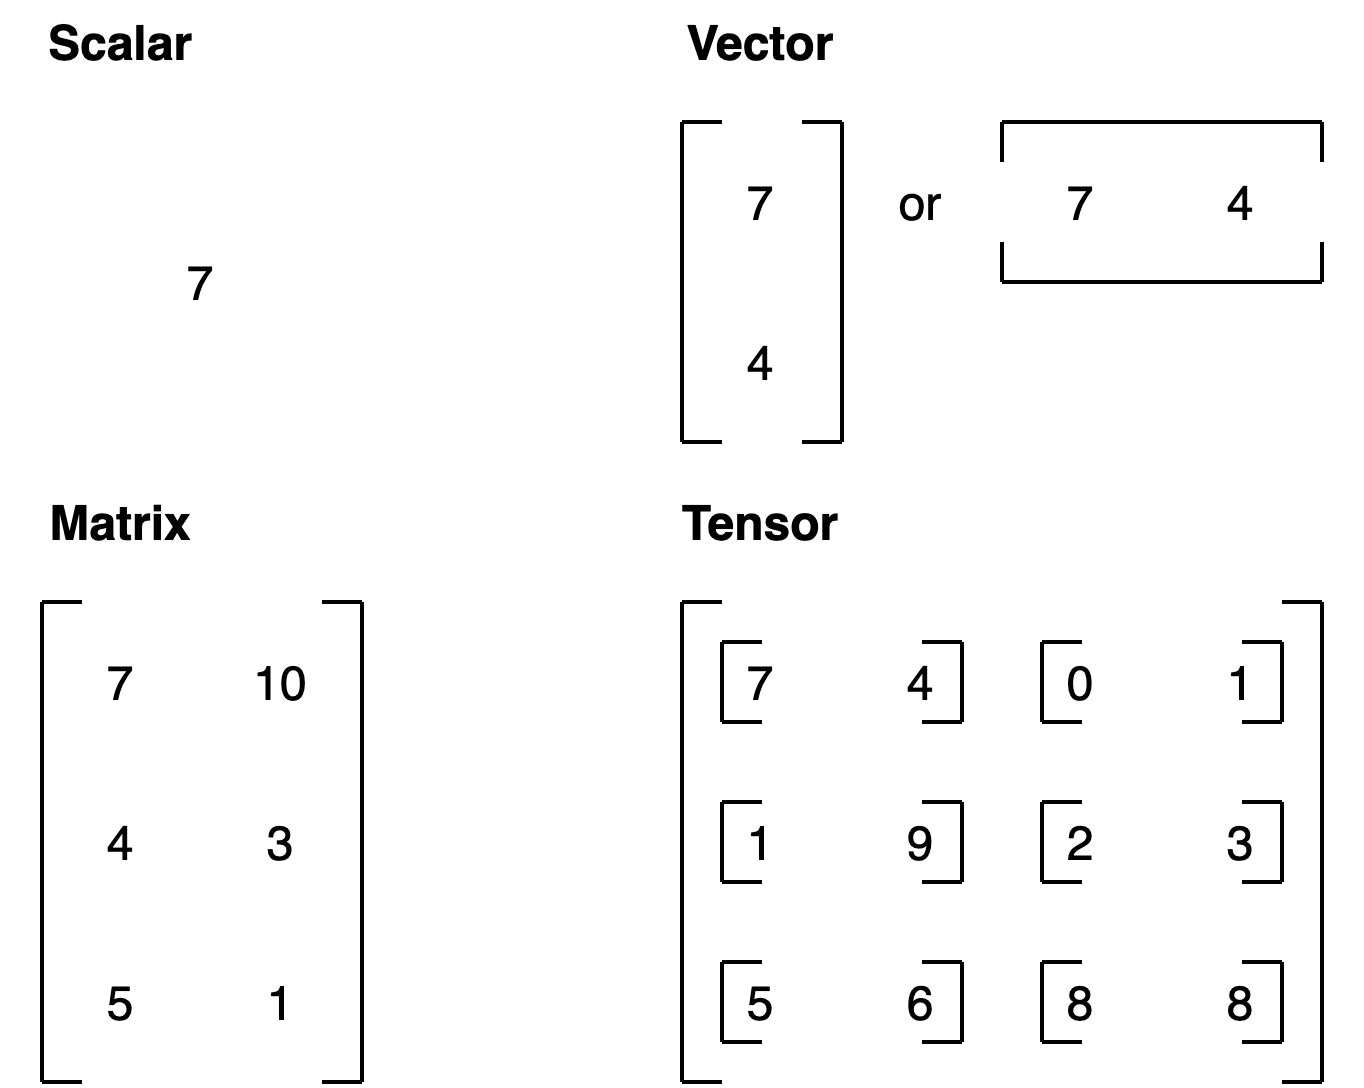

# **15 - Creating tensors with TensorFlow and `tf.Variable()`**

You can also (although you likely rarely will, because often, when working with data, tensors are created for you automatically) create tensors using `tf.Variable()`.

The difference between tf.Variable() and `tf.constant()` is tensors created with `tf.constant()` are immutable (can't be changed, can only be used to create a new tensor), where as, tensors created with `tf.Variable()` are mutable (can be changed).

In [12]:
# Create the same tensor with tf.Variable() as above
changeable_tensor = tf.Variable([10,7])
unchangeable_tensor = tf.constant([10,7])
changeable_tensor, unchangeable_tensor

(<tf.Variable 'Variable:0' shape=(2,) dtype=int32, numpy=array([10,  7], dtype=int32)>,
 <tf.Tensor: shape=(2,), dtype=int32, numpy=array([10,  7], dtype=int32)>)

Let's try change one of the elements in our changeable tensor

In [13]:
# Will error (requires the .assign() method)
changeable_tensor[0] = 7

TypeError: ignored

In [14]:
# How about we try `.assign()`
changeable_tensor[0].assign(7)
changeable_tensor
#To change an element of a tf.Variable() tensor requires the assign() method.

<tf.Variable 'Variable:0' shape=(2,) dtype=int32, numpy=array([7, 7], dtype=int32)>

In [15]:
# Let's try change our unchangeable tensor
# Will error (can't change tf.constant())
unchangeable_tensor[0].assign(7)
unchangeable_tensor


AttributeError: ignored

Which one should you use? `tf.constant()` or `tf.Variable()`?

It will depend on what your problem requires. However, most of the time, TensorFlow will automatically choose for you (when loading data or modelling data).

# **16 - Creating random tensors with TensorFlow**
### Random tensors are tensors of some arbitrary size which contain random numbers
Why would you want to create random tensors?

This is what neural networks use to intialize their weights (patterns) that they're trying to learn in the data.

For example, the process of a neural network learning often involves taking a random n-dimensional array of numbers and refining them until they represent some kind of pattern (a compressed way to represent the original data).

### **How a network learns**
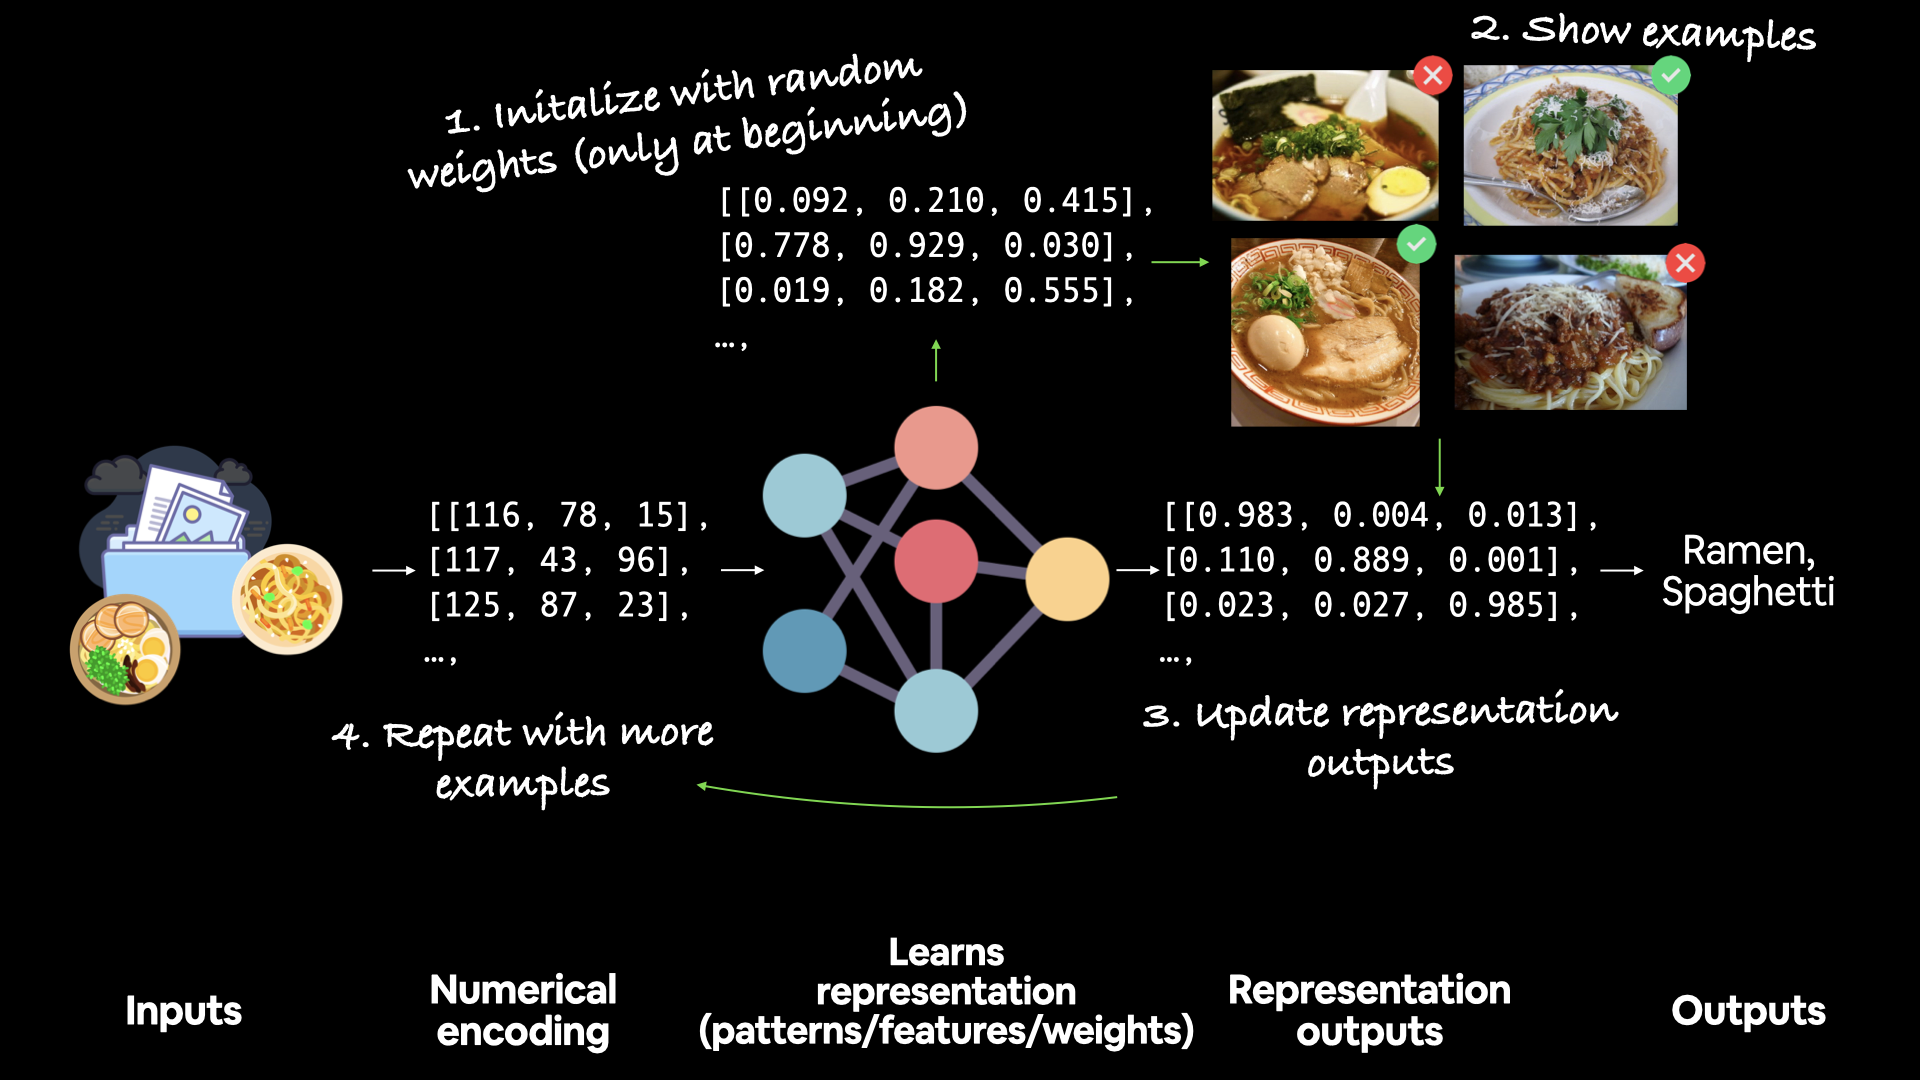

A network learns by starting with random patterns (1) then going through demonstrative examples of data (2) whilst trying to update its random patterns to represent the examples (3).

We can create random tensors by using the `tf.random.Generator` class.

In [16]:
# Let's create two random (but the same) tensors 
random_1 = tf.random.Generator.from_seed(42) # set seed for reproducibility
random_1 = random_1.normal(shape=(3,2)) #create tensor from a normal distribution 
random_2 = tf.random.Generator.from_seed(42)
random_2 = random_2.normal(shape=(3,2))

# Are they equal?
random_1 , random_2 , random_1 == random_2


(<tf.Tensor: shape=(3, 2), dtype=float32, numpy=
 array([[-0.7565803 , -0.06854702],
        [ 0.07595026, -1.2573844 ],
        [-0.23193765, -1.8107855 ]], dtype=float32)>,
 <tf.Tensor: shape=(3, 2), dtype=float32, numpy=
 array([[-0.7565803 , -0.06854702],
        [ 0.07595026, -1.2573844 ],
        [-0.23193765, -1.8107855 ]], dtype=float32)>,
 <tf.Tensor: shape=(3, 2), dtype=bool, numpy=
 array([[ True,  True],
        [ True,  True],
        [ True,  True]])>)

The random tensors we've made are actually [pseudorandom numbers](https://www.computerhope.com/jargon/p/pseudo-random.htm) (they appear as random, but really aren't).

If we set a seed we'll get the same random numbers (if you've ever used NumPy, this is similar to np.random.seed(42)).

Setting the seed says, "hey, create some random numbers, but flavour them with X" (X is the seed).

What do you think will happen when we change the seed?

In [17]:
# Create two random (and different) tensors
random_3 = tf.random.Generator.from_seed(42)
random_3 = random_3.normal(shape=(3, 2))
random_4 = tf.random.Generator.from_seed(11)
random_4 = random_4.normal(shape=(3, 2))

# Check the tensors and see if they are equal
random_3, random_4, random_1 == random_3, random_3 == random_4

(<tf.Tensor: shape=(3, 2), dtype=float32, numpy=
 array([[-0.7565803 , -0.06854702],
        [ 0.07595026, -1.2573844 ],
        [-0.23193765, -1.8107855 ]], dtype=float32)>,
 <tf.Tensor: shape=(3, 2), dtype=float32, numpy=
 array([[ 0.2730574 , -0.29925638],
        [-0.3652325 ,  0.61883307],
        [-1.0130816 ,  0.2829171 ]], dtype=float32)>,
 <tf.Tensor: shape=(3, 2), dtype=bool, numpy=
 array([[ True,  True],
        [ True,  True],
        [ True,  True]])>,
 <tf.Tensor: shape=(3, 2), dtype=bool, numpy=
 array([[False, False],
        [False, False],
        [False, False]])>)

What if you wanted to shuffle the order of a tensor?

Let's say you working with 15,000 images of cats and dogs and the first 10,000 images of were of cats and the next 5,000 were of dogs. This order could effect how a neural network learns (it may overfit by learning the order of the data), instead, it might be a good idea to move your data around.

# **17 - Shuffling the order of tensors**

In [18]:
import tensorflow as tf


In [19]:
# Shuffle a tensor (valuable for when you want to shuffle your data so the inherent order doesn't effect learning)
not_shuffled = tf.constant([[10,7],
                           [3,4],
                           [2,5]])
not_shuffled.ndim

2

In [20]:
not_shuffled  #shape=(3,2) oldugu icin bir ustteki dimensional sayisi 2 cikti.

<tf.Tensor: shape=(3, 2), dtype=int32, numpy=
array([[10,  7],
       [ 3,  4],
       [ 2,  5]], dtype=int32)>

In [21]:
# Shuffle our non-shuffled tensor
tf.random.shuffle(not_shuffled)  #every time you run it,it's a different order

<tf.Tensor: shape=(3, 2), dtype=int32, numpy=
array([[ 3,  4],
       [10,  7],
       [ 2,  5]], dtype=int32)>

*Burada hoca global seed ve operation seed ile alakali deneme odevi verdi.
Linkteki (https://www.tensorflow.org/api_docs/python/tf/random/set_seed)ornekleri yaptigim ayri bir not defteri (global seed vs operation seed) olusturdum*

# **18 - Creating tensors from NumPy arrays**

In [22]:
import tensorflow as tf

In [23]:
# 17'de tanimladigimizi tekrar tanimliyoruz
not_shuffled = tf.constant([[10,7],
                           [3,4],
                           [2,5]])

In [24]:
tf.random.shuffle(not_shuffled, seed=42) #operation random seed /// her yeniledigimizde sirasi farkli sonuc veriyor

<tf.Tensor: shape=(3, 2), dtype=int32, numpy=
array([[ 2,  5],
       [ 3,  4],
       [10,  7]], dtype=int32)>

In [25]:
# ustune global leveli eklersek sadece ilk tanimladigimizdaki sirayi verir:
tf.random.set_seed(42) # global level random seed
tf.random.shuffle(not_shuffled, seed=42) # operation levek random seed

<tf.Tensor: shape=(3, 2), dtype=int32, numpy=
array([[10,  7],
       [ 3,  4],
       [ 2,  5]], dtype=int32)>

### Other ways to make sensors

In [26]:
# Create a tensor of all ones
tf.ones([10, 7])


<tf.Tensor: shape=(10, 7), dtype=float32, numpy=
array([[1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1.]], dtype=float32)>

In [27]:
# Create a tensor of all zeroes
tf.zeros(shape=(3,4))


<tf.Tensor: shape=(3, 4), dtype=float32, numpy=
array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]], dtype=float32)>

### Turn NumPy arrays into tensors

The main difference between NumPy and TensorFlow is that tensors can be run on a GPU (much faster for numerical computing)

In [28]:
# You can also turn NumPy arrays into tensors
import numpy as np
numpy_A = np.arange(1, 25, dtype=np.int32) # create a NumPy array between 1-25
numpy_A



array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24], dtype=int32)

In [29]:
A = tf.constant(numpy_A)
A

<tf.Tensor: shape=(24,), dtype=int32, numpy=
array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24], dtype=int32)>

In [30]:
# Let's change the shape of A (the old shape is 24, as you see up there)
A = tf.constant(numpy_A , shape=(2,3,4))
A

<tf.Tensor: shape=(2, 3, 4), dtype=int32, numpy=
array([[[ 1,  2,  3,  4],
        [ 5,  6,  7,  8],
        [ 9, 10, 11, 12]],

       [[13, 14, 15, 16],
        [17, 18, 19, 20],
        [21, 22, 23, 24]]], dtype=int32)>

In [31]:
A = tf.constant(numpy_A , shape=(2,3,4))
B = tf.constant(numpy_A)
A, B

(<tf.Tensor: shape=(2, 3, 4), dtype=int32, numpy=
 array([[[ 1,  2,  3,  4],
         [ 5,  6,  7,  8],
         [ 9, 10, 11, 12]],
 
        [[13, 14, 15, 16],
         [17, 18, 19, 20],
         [21, 22, 23, 24]]], dtype=int32)>,
 <tf.Tensor: shape=(24,), dtype=int32, numpy=
 array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24], dtype=int32)>)

# **19 - Getting information from your tensors (tensor attributes)**
* Shape
* Rank
* axis or dimension
* Size
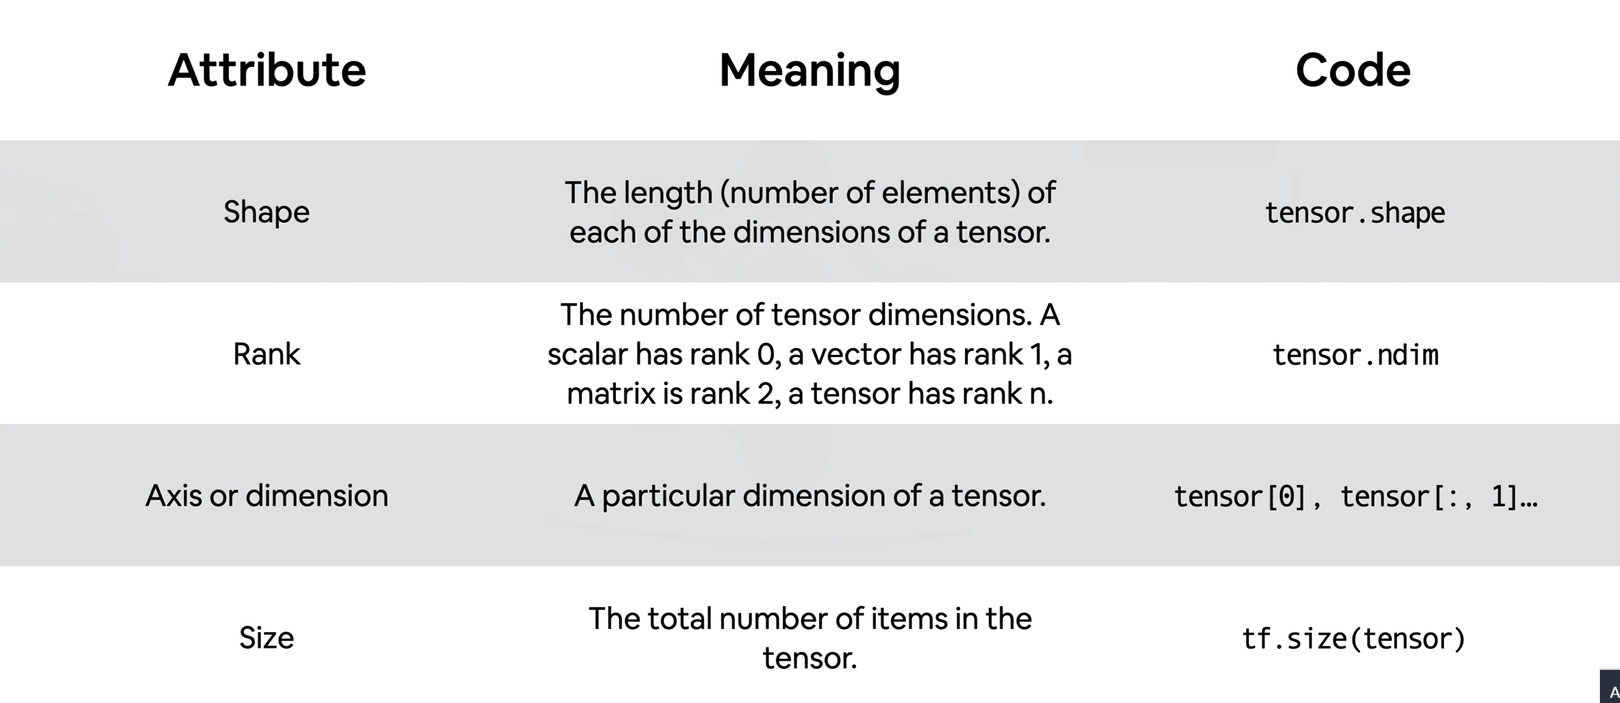

In [32]:
# Create a rank 4 tensor (4 dimensions)
rank_4_tensor = tf.zeros(shape=[2,3,4,5])
rank_4_tensor

<tf.Tensor: shape=(2, 3, 4, 5), dtype=float32, numpy=
array([[[[0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.]],

        [[0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.]],

        [[0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.]]],


       [[[0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.]],

        [[0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.]],

        [[0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.]]]], dtype=float32)>

In [33]:
rank_4_tensor[0]

<tf.Tensor: shape=(3, 4, 5), dtype=float32, numpy=
array([[[0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.]],

       [[0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.]],

       [[0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.]]], dtype=float32)>

In [34]:
rank_4_tensor.shape, rank_4_tensor.ndim, tf.size(rank_4_tensor)

(TensorShape([2, 3, 4, 5]), 4, <tf.Tensor: shape=(), dtype=int32, numpy=120>)

In [35]:
2*3*4*5

120

In [36]:
# Get varaious attributes of our tensor
print("Datatype of every element:",rank_4_tensor.dtype)
print("Number of dimensions (rank)", rank_4_tensor.ndim)
print("Shape of tensor:",rank_4_tensor.shape)
print("Elements along the 0 axis:", rank_4_tensor.shape[0])
print("Elements along the last axis:", rank_4_tensor.shape[-1])  #//yana not aldim
print("Total number of elements in our tensor:", tf.size(rank_4_tensor))
print("Total number of elements in our tensor:", tf.size(rank_4_tensor).numpy())


Datatype of every element: <dtype: 'float32'>
Number of dimensions (rank) 4
Shape of tensor: (2, 3, 4, 5)
Elements along the 0 axis: 2
Elements along the last axis: 5
Total number of elements in our tensor: tf.Tensor(120, shape=(), dtype=int32)
Total number of elements in our tensor: 120


# **20 - Indexing and expanding tensors**
Tensors can be indexed just like Python lists

In [37]:
some_list = [1,2,3,4]
some_list[:2]

[1, 2]

In [38]:
# Get the first 2 elements of each dimension
rank_4_tensor[:2,:2,:2,:2]




<tf.Tensor: shape=(2, 2, 2, 2), dtype=float32, numpy=
array([[[[0., 0.],
         [0., 0.]],

        [[0., 0.],
         [0., 0.]]],


       [[[0., 0.],
         [0., 0.]],

        [[0., 0.],
         [0., 0.]]]], dtype=float32)>

In [39]:
rank_4_tensor.shape

TensorShape([2, 3, 4, 5])

In [40]:
# Get the first element from each dimension from each index except for thne final one
rank_4_tensor[:1,:1,:1,:]

<tf.Tensor: shape=(1, 1, 1, 5), dtype=float32, numpy=array([[[[0., 0., 0., 0., 0.]]]], dtype=float32)>

In [41]:
# Create a rank 2 tensor (2 dimensions)
rank_2_tensor = tf.constant([[10,7],
                             [3,4]])
rank_2_tensor.shape, rank_2_tensor.ndim

(TensorShape([2, 2]), 2)

In [42]:
rank_2_tensor

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[10,  7],
       [ 3,  4]], dtype=int32)>

In [43]:
some_list, some_list[-1]

([1, 2, 3, 4], 4)

In [44]:
# get the last item of each of row of our rank 2 tensor
rank_2_tensor[:,-1]

<tf.Tensor: shape=(2,), dtype=int32, numpy=array([7, 4], dtype=int32)>

In [45]:
# Add in extra dimension to our rank 2 tensor

rank_3_tensor = rank_2_tensor[..., tf.newaxis]   #yana not aldim
rank_3_tensor, rank_2_tensor

(<tf.Tensor: shape=(2, 2, 1), dtype=int32, numpy=
 array([[[10],
         [ 7]],
 
        [[ 3],
         [ 4]]], dtype=int32)>, <tf.Tensor: shape=(2, 2), dtype=int32, numpy=
 array([[10,  7],
        [ 3,  4]], dtype=int32)>)

In [46]:
# Alternative to tf.newaxis
tf.expand_dims(rank_2_tensor, axis=-1) # "-1" means expand the final axis


<tf.Tensor: shape=(2, 2, 1), dtype=int32, numpy=
array([[[10],
        [ 7]],

       [[ 3],
        [ 4]]], dtype=int32)>

In [47]:
# Expand the 0-axis
tf.expand_dims(rank_2_tensor, axis=0)

<tf.Tensor: shape=(1, 2, 2), dtype=int32, numpy=
array([[[10,  7],
        [ 3,  4]]], dtype=int32)>

In [48]:
rank_2_tensor

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[10,  7],
       [ 3,  4]], dtype=int32)>

# **21 - Manipulating tensors with basic operations**

### *Basic Operations (`+` , `-`, *, `/` )*





In [49]:
# You can add values to a tensor using the addition operator
tensor = tf.constant([[10, 7], [3, 4]])
tensor + 10

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[20, 17],
       [13, 14]], dtype=int32)>

Since we used tf.constant(), the original tensor is unchanged (the addition gets done on a copy).

In [50]:
# Original tensor is unchanged
tensor

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[10,  7],
       [ 3,  4]], dtype=int32)>

In [51]:
# Multiplication also works (known as element-wise multiplication)
tensor * 10

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[100,  70],
       [ 30,  40]], dtype=int32)>

In [52]:
# Substraction
tensor - 10

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[ 0, -3],
       [-7, -6]], dtype=int32)>

In [53]:
# we can use tensorflow built-in function too
tf.multiply(tensor , 10)

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[100,  70],
       [ 30,  40]], dtype=int32)>

In [54]:
# The original tensor is still unchanged
tensor

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[10,  7],
       [ 3,  4]], dtype=int32)>

# **22 - Matrix multiplication with tensors PART I**
### In machine learning, [matrix  multiplication](https://www.mathsisfun.com/algebra/matrix-multiplying.html) is one of the most common tensor operations.

### TensorFlow implements this matrix multiplication functionality in the `tf.matmul()` method.

### There are two rules our tensors (or matrices) need to fulfill if we're going to matrix multiply them:

### 1-The inner dimensions must match
* (3, 5) @ (3, 5) won't work
* (5, 3) @ (3, 5) will work
* (3, 5) @ (5, 3) will work
### 2-The resulting matrix has the shape of the outer dimensions
* (5, 3) @ (3, 5) -> (5, 5)
* (3, 5) @ (5, 3) -> (3, 3)

**Note:** '@' in Python is the symbol for matrix multiplication.

In [55]:
# Matrix multiplication in tensorflow
print(tensor)
tf.matmul(tensor,tensor)

tf.Tensor(
[[10  7]
 [ 3  4]], shape=(2, 2), dtype=int32)


<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[121,  98],
       [ 42,  37]], dtype=int32)>

In [56]:
tensor, tensor

(<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
 array([[10,  7],
        [ 3,  4]], dtype=int32)>, <tf.Tensor: shape=(2, 2), dtype=int32, numpy=
 array([[10,  7],
        [ 3,  4]], dtype=int32)>)

In [57]:
tensor * tensor

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[100,  49],
       [  9,  16]], dtype=int32)>

In [58]:
# Matrix multiplication with Python operator "@"
tensor @ tensor

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[121,  98],
       [ 42,  37]], dtype=int32)>

Both of these examples work because our tensor variable is of shape (2, 2).

What if we created some tensors which had mismatched shapes?

In [59]:
# Create a tensor (3,2) tensor
X = tf.constant([[1,2],
                 [3,4],
                 [5,6]])
# Create another (3,2) tensor
Y = tf.constant([[7,8],
                 [9,10],
                 [11,12]])
X, Y

(<tf.Tensor: shape=(3, 2), dtype=int32, numpy=
 array([[1, 2],
        [3, 4],
        [5, 6]], dtype=int32)>, <tf.Tensor: shape=(3, 2), dtype=int32, numpy=
 array([[ 7,  8],
        [ 9, 10],
        [11, 12]], dtype=int32)>)

In [60]:
# Try to matrix multiply tensors of same shape (will error)
X @ Y


InvalidArgumentError: ignored

Trying to matrix multiply two tensors with the shape (3, 2) errors because the inner dimensions don't match.

We need to either:

* Reshape X to (2, 3) so it's (2, 3) @ (3, 2).
* Reshape Y to (3, 2) so it's (3, 2) @ (2, 3).
We can do this with either:

* `tf.reshape()` - allows us to reshape a tensor into a defined shape.
* `tf.transpose()` - switches the dimensions of a given tensor.

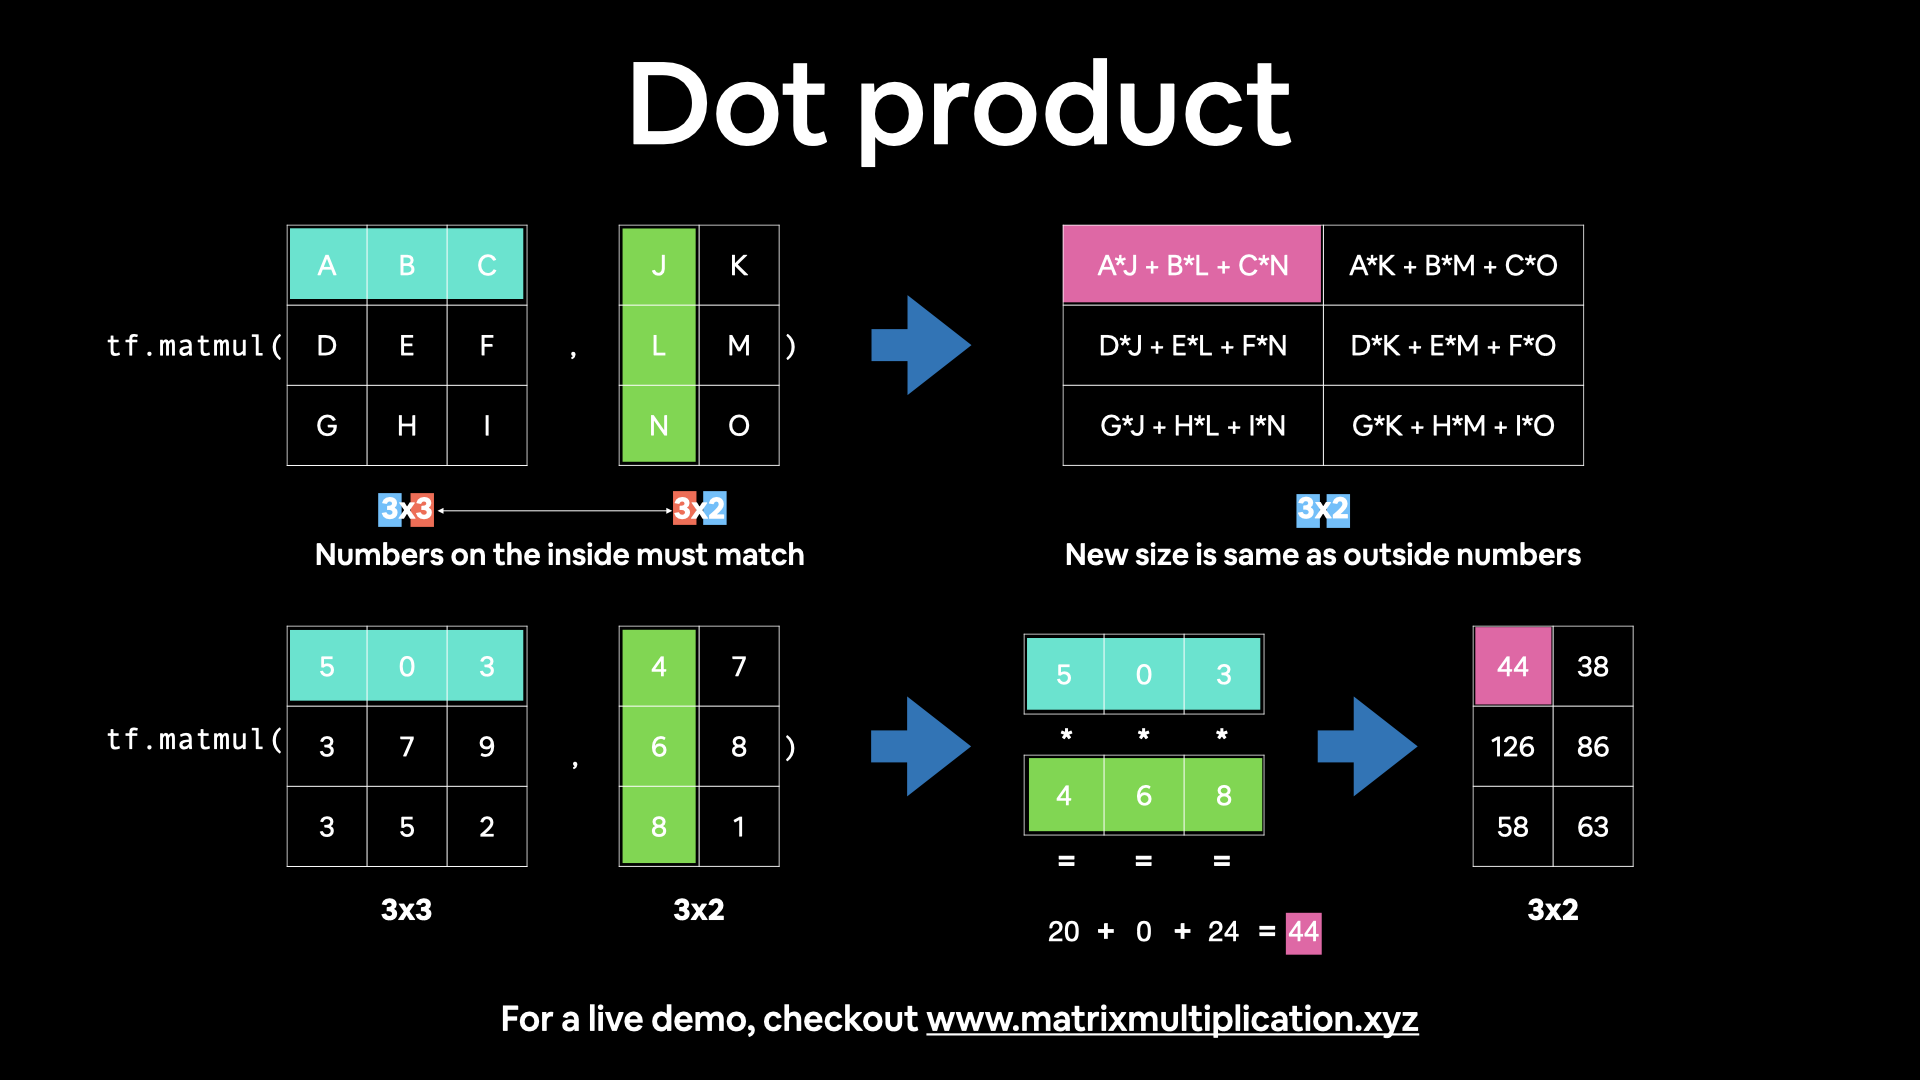

# **23 - Matrix multiplication with tensors PART II**

In [61]:
Y

<tf.Tensor: shape=(3, 2), dtype=int32, numpy=
array([[ 7,  8],
       [ 9, 10],
       [11, 12]], dtype=int32)>

In [62]:
# Let's change the shape of Y
# Example of reshape (3, 2) -> (2, 3)
tf.reshape(Y, shape=(2,3))

<tf.Tensor: shape=(2, 3), dtype=int32, numpy=
array([[ 7,  8,  9],
       [10, 11, 12]], dtype=int32)>

In [63]:
X.shape, tf.reshape(Y, shape=(2,3)).shape

(TensorShape([3, 2]), TensorShape([2, 3]))

In [64]:
# Try to matrix multiply X by reshaped Y
X @ tf.reshape(Y,shape=(2,3))

<tf.Tensor: shape=(3, 3), dtype=int32, numpy=
array([[ 27,  30,  33],
       [ 61,  68,  75],
       [ 95, 106, 117]], dtype=int32)>

It worked, let's try the same with a reshaped X, except this time we'll use `tf.transpose()` and `tf.matmul()`.

In [65]:
# Example of transpose (3, 2) -> (2, 3)
tf.transpose(X)

<tf.Tensor: shape=(2, 3), dtype=int32, numpy=
array([[1, 3, 5],
       [2, 4, 6]], dtype=int32)>

In [66]:
# Try matrix multiplication 
tf.matmul(tf.transpose(X), Y)

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[ 89,  98],
       [116, 128]], dtype=int32)>

In [67]:
# You can achieve the same result with parameters
tf.matmul(a=X, b=Y, transpose_a=True, transpose_b=False)


<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[ 89,  98],
       [116, 128]], dtype=int32)>

Notice the difference in the resulting shapes when tranposing X or reshaping Y.

This is because of the 2nd rule mentioned above:

* (3, 2) @ (2, 3) -> (3, 3) done with X @ tf.reshape(Y, shape=(2, 3))
* (2, 3) @ (3, 2) -> (2, 2) done with tf.matmul(tf.transpose(X), Y)

This kind of data manipulation is a reminder: you'll spend a lot of your time in machine learning and working with neural networks reshaping data (in the form of tensors) to prepare it to be used with various operations (such as feeding it to a model).

In [68]:
tf.matmul(X, tf.reshape(Y,shape=(2,3)))

<tf.Tensor: shape=(3, 3), dtype=int32, numpy=
array([[ 27,  30,  33],
       [ 61,  68,  75],
       [ 95, 106, 117]], dtype=int32)>

In [69]:
# Let's change only X shape
tf.reshape(X, shape=(2,3)).shape , Y.shape

(TensorShape([2, 3]), TensorShape([3, 2]))

In [70]:

tf.matmul(tf.reshape(X,shape=(2,3)), Y)

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[ 58,  64],
       [139, 154]], dtype=int32)>

In [71]:
# Can do the same with transpose
X , tf.transpose(X), tf.reshape(X, shape=(2,3))

(<tf.Tensor: shape=(3, 2), dtype=int32, numpy=
 array([[1, 2],
        [3, 4],
        [5, 6]], dtype=int32)>, <tf.Tensor: shape=(2, 3), dtype=int32, numpy=
 array([[1, 3, 5],
        [2, 4, 6]], dtype=int32)>, <tf.Tensor: shape=(2, 3), dtype=int32, numpy=
 array([[1, 2, 3],
        [4, 5, 6]], dtype=int32)>)

In [72]:
# BU KISMI KENDIM EKLEDIM TRANSPOSE KISMINI BIRAZ DAHA KAVRAMAK ICIN
Z = tf.constant([[[ 1,  2,  3],
                  [ 4,  5,  6]],
                 [[ 7,  8,  9],
                  [10, 11, 12]]])
Z , tf.transpose(Z) 


(<tf.Tensor: shape=(2, 2, 3), dtype=int32, numpy=
 array([[[ 1,  2,  3],
         [ 4,  5,  6]],
 
        [[ 7,  8,  9],
         [10, 11, 12]]], dtype=int32)>,
 <tf.Tensor: shape=(3, 2, 2), dtype=int32, numpy=
 array([[[ 1,  7],
         [ 4, 10]],
 
        [[ 2,  8],
         [ 5, 11]],
 
        [[ 3,  9],
         [ 6, 12]]], dtype=int32)>)

In [73]:
# Try matrix multiplication with transpose rather than reshape
tf.matmul(tf.transpose(X),Y)

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[ 89,  98],
       [116, 128]], dtype=int32)>

# **24 - Matrix Multiplication with tensors PART III**
## The dot product

Matrix multiplication is also referred to as the dot product.

You can perform matrix multiplication using :
* `tf.matmul()` 
* `tf.tensordot()`
* `@`

In [74]:
X , Y

(<tf.Tensor: shape=(3, 2), dtype=int32, numpy=
 array([[1, 2],
        [3, 4],
        [5, 6]], dtype=int32)>, <tf.Tensor: shape=(3, 2), dtype=int32, numpy=
 array([[ 7,  8],
        [ 9, 10],
        [11, 12]], dtype=int32)>)

In [75]:
# Perform the dot product on X and Y (requires X or Y to be transposed)
tf.tensordot(tf.transpose(X), Y, axes=1)

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[ 89,  98],
       [116, 128]], dtype=int32)>

You might notice that although using both reshape and tranpose work, you get different results when using each.

Let's see an example, first with `tf.transpose()` then with `tf.reshape()`.

In [76]:
# Perform matrix multiplication between X and Y (transposed)
tf.matmul(X, tf.transpose(Y))

<tf.Tensor: shape=(3, 3), dtype=int32, numpy=
array([[ 23,  29,  35],
       [ 53,  67,  81],
       [ 83, 105, 127]], dtype=int32)>

In [77]:
# Perform matrix multiplication between X and Y (reshaped)
tf.matmul(X, tf.reshape(Y, shape=(2,3)))

<tf.Tensor: shape=(3, 3), dtype=int32, numpy=
array([[ 27,  30,  33],
       [ 61,  68,  75],
       [ 95, 106, 117]], dtype=int32)>

They result in different values.

Which is strange because when dealing with Y (a (3x2) matrix), reshaping to (2, 3) and tranposing it result in the same shape.

In [78]:
# Check shapes of Y, reshaped Y and tranposed Y
Y.shape, tf.reshape(Y, (2, 3)).shape, tf.transpose(Y).shape

(TensorShape([3, 2]), TensorShape([2, 3]), TensorShape([2, 3]))

But calling tf.reshape() and tf.transpose() on Y don't necessarily result in the same values.

In [79]:
# Check the values of Y, reshaped Y and transposed Y
print("Normal Y:")
print(Y, "\n") # "\n" is for newline

print("Y reshaped to (2,3):")
print(tf.reshape(Y,shape=(2,3)), "\n")

print("Y transposed:")
print(tf.transpose(Y))

Normal Y:
tf.Tensor(
[[ 7  8]
 [ 9 10]
 [11 12]], shape=(3, 2), dtype=int32) 

Y reshaped to (2,3):
tf.Tensor(
[[ 7  8  9]
 [10 11 12]], shape=(2, 3), dtype=int32) 

Y transposed:
tf.Tensor(
[[ 7  9 11]
 [ 8 10 12]], shape=(2, 3), dtype=int32)


### Generally, when performing matrix multiplication on two tensors and one of the axes doesn't line up, you will transpose (rather than reshape) one of the tensors to get satisify the matrix multiplication rules.

As you can see, the outputs of tf.reshape() and tf.transpose() when called on Y, even though they have the same shape, are different.

This can be explained by the default behaviour of each method:

* `tf.reshape()` - change the shape of the given tensor (first) and then insert values in order they appear (in our case, 7, 8, 9, 10, 11, 12).
* `tf.transpose()` - swap the order of the axes, by default the last axis becomes the first, however the order can be changed using the perm parameter.
So which should you use?

Again, most of the time these operations (when they need to be run, such as during the training a neural network, will be implemented for you).

But generally, whenever performing a matrix multiplication and the shapes of two matrices don't line up, you will transpose (not reshape) one of them in order to line them up.

# **25 - Changing the datatype of tensors**
Sometimes you'll want to alter the default datatype of your tensor.

This is common when you want to compute using less precision (e.g. 16-bit floating point numbers vs. 32-bit floating point numbers).

Computing with less precision is useful on devices with less computing capacity such as mobile devices (because the less bits, the less space the computations require).

You can change the datatype of a tensor using `tf.cast()`.

In [80]:
# Create a new tensor with default datatype (float32)
B = tf.constant([1.7, 7.4])
B, B.dtype

(<tf.Tensor: shape=(2,), dtype=float32, numpy=array([1.7, 7.4], dtype=float32)>,
 tf.float32)

In [81]:
# Create a new tensor with default datatype (int32)
C = tf.constant([7,10])
C.dtype

tf.int32

In [82]:
# Change from float32 to float16 (reduced precision)
D = tf.cast(B, dtype=tf.float16)
D, D.dtype

(<tf.Tensor: shape=(2,), dtype=float16, numpy=array([1.7, 7.4], dtype=float16)>,
 tf.float16)

In [83]:
# Change from int32 to float 32
E = tf.cast(C, dtype=tf.float32)
E

<tf.Tensor: shape=(2,), dtype=float32, numpy=array([ 7., 10.], dtype=float32)>

# **26 - Tensor aggregation (finding the min, max, mean & more)**

### **Getting the absolute value**

Sometimes you'll want the absolute values (all values are positive) of elements in your tensors.

To do so, you can use `tf.abs()`.

### Aggregating tensors = cenodensing them from multiple values down to a smaller amount of values.

In [84]:
# Create tensor with negative values
A = tf.constant([-7,-10])
A

<tf.Tensor: shape=(2,), dtype=int32, numpy=array([ -7, -10], dtype=int32)>

In [85]:
# Get the absolute values
tf.abs(A)

<tf.Tensor: shape=(2,), dtype=int32, numpy=array([ 7, 10], dtype=int32)>

### Let's go through the following forms of aggregation:
* Get the minimum -- `tf.reduce_min()`
* Get the maximum -- `tf.reduce_max() `
* Get the mean of a tensor -- `tf.reduce_mean()`
* Get the sum of a tensor -- `tf.reduce_sum()`

* **Note:**  typically, each of these is under the math module, e.g. tf.math.`reduce_min()` but you can use the alias `tf.reduce_min()`.


Let's see them in action.

In [86]:
# Create a random tensor with values between 0 and 100 of size 50
E = tf.constant(np.random.randint(0, 100, size=50))
E

<tf.Tensor: shape=(50,), dtype=int64, numpy=
array([73, 49, 19, 51, 15, 95, 23, 19, 71, 45, 95, 62, 78,  6,  6, 68, 51,
       95, 10, 53,  1, 88, 93, 64, 48,  5, 90, 23, 56, 75,  0, 34, 74, 23,
       83, 59, 76, 50, 72, 50,  5, 24, 68, 52, 57, 95, 99,  5, 91, 43])>

In [87]:
tf.size(E), E.shape, E.ndim

(<tf.Tensor: shape=(), dtype=int32, numpy=50>, TensorShape([50]), 1)

In [88]:
# Find the minimum
tf.reduce_min(E)

<tf.Tensor: shape=(), dtype=int64, numpy=0>

In [89]:
# Find the maximum
tf.reduce_max(E)

<tf.Tensor: shape=(), dtype=int64, numpy=99>

In [90]:
# Find the mean
tf.reduce_mean(E)

<tf.Tensor: shape=(), dtype=int64, numpy=51>

In [91]:
# Find the sum
tf.reduce_sum(E)

<tf.Tensor: shape=(), dtype=int64, numpy=2587>

# **27 - Tensor troubleshooting example (updating tensor datatypes)**

In [92]:
# Find the variance of our tensor
tf.reduce_variance(E)   # WON'T WORK

AttributeError: ignored

In [ ]:
# To find the variance of our tensor, we need access to tensorflow_probability
import tensorflow_probability as tfp
tfp.stats.variance(E)

In [93]:
# Find the standard deviation
tf.math.reduce_std(tf.cast(E, dtype=tf.float32))

<tf.Tensor: shape=(), dtype=float32, numpy=30.361034>

In [94]:
# Find the variance of our E tensor without probability
tf.math.reduce_variance(tf.cast(E, dtype=tf.float32))

<tf.Tensor: shape=(), dtype=float32, numpy=921.7924>

# **28 - Finding the positional minimum and maximum of a tensor (argmin and argmax)**

How about finding the position a tensor where the maximum value occurs?

This is helpful when you want to line up your labels (say ['Green', 'Blue', 'Red']) with your prediction probabilities tensor (e.g. [0.98, 0.01, 0.01]).

In this case, the predicted label (the one with the highest prediction probability) would be 'Green'.

You can do the same for the minimum (if required) with the following:

* `tf.argmax()` - find the position of the maximum element in a given tensor.

* `tf.argmin()` - find the position of the minimum element in a given tensor.

In [95]:
# Create a new tensor with 50 values between 0 and 1 for finding positional minimum and maximum
tf.random.set_seed(42)
F = tf.random.uniform(shape=[50])
F

<tf.Tensor: shape=(50,), dtype=float32, numpy=
array([0.6645621 , 0.44100678, 0.3528825 , 0.46448255, 0.03366041,
       0.68467236, 0.74011743, 0.8724445 , 0.22632635, 0.22319686,
       0.3103881 , 0.7223358 , 0.13318717, 0.5480639 , 0.5746088 ,
       0.8996835 , 0.00946367, 0.5212307 , 0.6345445 , 0.1993283 ,
       0.72942245, 0.54583454, 0.10756552, 0.6767061 , 0.6602763 ,
       0.33695042, 0.60141766, 0.21062577, 0.8527372 , 0.44062173,
       0.9485276 , 0.23752594, 0.81179297, 0.5263394 , 0.494308  ,
       0.21612847, 0.8457197 , 0.8718841 , 0.3083862 , 0.6868038 ,
       0.23764038, 0.7817228 , 0.9671384 , 0.06870162, 0.79873943,
       0.66028714, 0.5871513 , 0.16461694, 0.7381023 , 0.32054043],
      dtype=float32)>

In [96]:
# Find the positional maximum
tf.argmax(F)

<tf.Tensor: shape=(), dtype=int64, numpy=42>

In [97]:
# Index on our largest value position
F[tf.argmax(F)]

<tf.Tensor: shape=(), dtype=float32, numpy=0.9671384>

In [98]:
# Find the max value of F
tf.reduce_max(F)

<tf.Tensor: shape=(), dtype=float32, numpy=0.9671384>

In [99]:
# Check for equality
F[tf.argmax(F)] == tf.reduce_max(F) #numpy=True dedigi icin esit cikmis oldu

<tf.Tensor: shape=(), dtype=bool, numpy=True>

In [100]:
# Find the positional minimum
tf.argmin(F)

<tf.Tensor: shape=(), dtype=int64, numpy=16>

In [101]:
# Find the minimum using the positional minimum index
F[tf.argmin(F)]

<tf.Tensor: shape=(), dtype=float32, numpy=0.009463668>

In [120]:
# Find the maximum element position of F
print(f"The maximum value of F is at position: {tf.argmax(F).numpy()}") 
print(f"The maximum value of F is: {tf.reduce_max(F).numpy()}") 
print(f"Using tf.argmax() to index F, the maximum value of F is: {F[tf.argmax(F)].numpy()}")
print(f"Are the two max values the same (they should be)? {F[tf.argmax(F)].numpy() == tf.reduce_max(F).numpy()}")

The maximum value of F is at position: 42
The maximum value of F is: 0.967138409614563
Using tf.argmax() to index F, the maximum value of F is: 0.967138409614563
Are the two max values the same (they should be)? True


# **29 - Squeezing a tensor (removing all 1-dimension axes)**

If you need to remove single-dimensions from a tensor (dimensions with size 1), you can use `tf.squeeze()`.

* `tf.squeeze()` - remove all dimensions of 1 from a tensor.

In [102]:
# Create a tensor to get started ( Create a rank 5 (5 dimensions) tensor of 50 numbers between 0 and 100)
G = tf.constant(tf.random.uniform(shape=[50]), shape=(1,1,1,1,50))
G

<tf.Tensor: shape=(1, 1, 1, 1, 50), dtype=float32, numpy=
array([[[[[0.68789124, 0.48447883, 0.9309944 , 0.252187  , 0.73115396,
           0.89256823, 0.94674826, 0.7493341 , 0.34925628, 0.54718256,
           0.26160395, 0.69734323, 0.11962581, 0.53484344, 0.7148968 ,
           0.87501776, 0.33967495, 0.17377627, 0.4418521 , 0.9008261 ,
           0.13803864, 0.12217975, 0.5754491 , 0.9417181 , 0.9186585 ,
           0.59708476, 0.6109482 , 0.82086265, 0.83269787, 0.8915849 ,
           0.01377225, 0.49807465, 0.57503664, 0.6856195 , 0.75972784,
           0.908944  , 0.40900218, 0.8765154 , 0.53890026, 0.42733097,
           0.401173  , 0.66623247, 0.16348064, 0.18220246, 0.97040176,
           0.06139731, 0.53034747, 0.9869994 , 0.4746945 , 0.8646754 ]]]]],
      dtype=float32)>

In [103]:
G.shape

TensorShape([1, 1, 1, 1, 50])

In [121]:
# Squeeze tensor G (remove all 1 dimensions)
G_squeezed = tf.squeeze(G)
G_squeezed, G_squeezed.shape

(<tf.Tensor: shape=(50,), dtype=float32, numpy=
 array([0.68789124, 0.48447883, 0.9309944 , 0.252187  , 0.73115396,
        0.89256823, 0.94674826, 0.7493341 , 0.34925628, 0.54718256,
        0.26160395, 0.69734323, 0.11962581, 0.53484344, 0.7148968 ,
        0.87501776, 0.33967495, 0.17377627, 0.4418521 , 0.9008261 ,
        0.13803864, 0.12217975, 0.5754491 , 0.9417181 , 0.9186585 ,
        0.59708476, 0.6109482 , 0.82086265, 0.83269787, 0.8915849 ,
        0.01377225, 0.49807465, 0.57503664, 0.6856195 , 0.75972784,
        0.908944  , 0.40900218, 0.8765154 , 0.53890026, 0.42733097,
        0.401173  , 0.66623247, 0.16348064, 0.18220246, 0.97040176,
        0.06139731, 0.53034747, 0.9869994 , 0.4746945 , 0.8646754 ],
       dtype=float32)>, TensorShape([50]))

# **30 - One-hot encoding tensors**

If you have a tensor of indicies and would like to one-hot encode it, you can use `tf.one_hot()`.

You should also specify the *depth* parameter (the level which you want to one-hot encode to).

In [105]:
# Create a list of indices
some_list = [0,1,2,3]   # could be red,green,blue,purple 

# One hot encode our list of indices
tf.one_hot(some_list, depth=4)

<tf.Tensor: shape=(4, 4), dtype=float32, numpy=
array([[1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.]], dtype=float32)>

You can also specify values for `on_value` and `off_value` instead of the default 0 and 1.

In [106]:
#Specify custom values for one hot encoding
tf.one_hot(some_list, depth=4, on_value="buraya 1 geliyor", off_value="Buraya 0 geliyor")

<tf.Tensor: shape=(4, 4), dtype=string, numpy=
array([[b'buraya 1 geliyor', b'Buraya 0 geliyor', b'Buraya 0 geliyor',
        b'Buraya 0 geliyor'],
       [b'Buraya 0 geliyor', b'buraya 1 geliyor', b'Buraya 0 geliyor',
        b'Buraya 0 geliyor'],
       [b'Buraya 0 geliyor', b'Buraya 0 geliyor', b'buraya 1 geliyor',
        b'Buraya 0 geliyor'],
       [b'Buraya 0 geliyor', b'Buraya 0 geliyor', b'Buraya 0 geliyor',
        b'buraya 1 geliyor']], dtype=object)>

# **31 - Trying out more tensor math operations**

## Squaring, log, square root

Many other common mathematical operations you'd like to perform at some stage, probably exist.

Let's take a look at:

* `tf.square()` - get the square of every value in a tensor.
* `tf.sqrt()` - get the squareroot of every value in a tensor (note: the elements need to be floats or this will error).
* `tf.math.log()` - get the natural log of every value in a tensor (elements need to floats).

In [107]:
# Create a new tensor
H = tf.range(1,10) #or we can write <--H = tf.constant(np.arange(1, 10))-->
H

<tf.Tensor: shape=(9,), dtype=int32, numpy=array([1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int32)>

In [108]:
# Square it
tf.square(H)

<tf.Tensor: shape=(9,), dtype=int32, numpy=array([ 1,  4,  9, 16, 25, 36, 49, 64, 81], dtype=int32)>

In [122]:
# Find the squareroot (will error), needs to be non-integer
tf.sqrt(H)


InvalidArgumentError: ignored

In [118]:
# InvalidArgumentError: Value for attr 'T' of int32 is not in the list of allowed values: bfloat16, half, float, double, complex64, complex128
# Let's change int32 to float32
tf.sqrt(tf.cast(H, dtype=tf.float32))

<tf.Tensor: shape=(9,), dtype=float32, numpy=
array([1.       , 1.4142135, 1.7320508, 2.       , 2.236068 , 2.4494898,
       2.6457512, 2.828427 , 3.       ], dtype=float32)>

In [123]:
# Find the log
tf.math.log(H)

InvalidArgumentError: ignored

In [110]:
# Again, change int32 to float32
tf.math.log(tf.cast(H,dtype=tf.float32))

<tf.Tensor: shape=(9,), dtype=float32, numpy=
array([0.       , 0.6931472, 1.0986123, 1.3862944, 1.609438 , 1.7917595,
       1.9459102, 2.0794415, 2.1972246], dtype=float32)>

In [124]:
# FOR FINDING THE LOG, WE CAN ALSO WRITE:

# H = tf.cast(H, dtype=tf.float32)    --> Change H to float32

# tf.sqrt(H)    -->   Find the square root

# tf.math.log(H)     --->    Find the log (input also needs to be float) 

### **Manipulating tf.Variable tensors**

Tensors created with `tf.Variable()` can be changed in place using methods such as:
* `.assign()` - assign a different value to a particular index of a variable tensor.
* `.add_assign()` - add to an existing value and reassign it at a particular index of a variable tensor.

In [125]:
# Create a variable tensor
I = tf.Variable(np.arange(0, 5))
I

<tf.Variable 'Variable:0' shape=(5,) dtype=int64, numpy=array([0, 1, 2, 3, 4])>

In [126]:
# Assign the final value a new value of 50
I.assign([0, 1, 2, 3, 50])

<tf.Variable 'UnreadVariable' shape=(5,) dtype=int64, numpy=array([ 0,  1,  2,  3, 50])>

In [127]:
# The change happens in place (the last value is now 50, not 4)
I

<tf.Variable 'Variable:0' shape=(5,) dtype=int64, numpy=array([ 0,  1,  2,  3, 50])>

In [128]:
# Add 10 to every element in I
I.assign_add([10, 10, 10, 10, 10])

<tf.Variable 'UnreadVariable' shape=(5,) dtype=int64, numpy=array([10, 11, 12, 13, 60])>

In [129]:
# Again, the change happens in place
I

<tf.Variable 'Variable:0' shape=(5,) dtype=int64, numpy=array([10, 11, 12, 13, 60])>

# **32 - Exploring TensorFlow and NumPy's compatiblity**

### **Note**: One of the main differences between a TensorFlow and a NumPy array is that a TensorFlow tensor can be run on a GPU or TPU (for faster numerical processing).

Tensors can also be converted to NumPy arrays using:

* `np.array()` - pass a tensor to convert to an ndarray (NumPy's main datatype).
* `tensor.numpy()` - call on a tensor to convert to an ndarray.

Doing this is helpful as it makes tensors iterable as well as allows us to use any of NumPy's methods on them.

In [111]:
# Create a tensor directly from a NumPy array
J = tf.constant(np.array([3. , 7. ,10.]))
J


<tf.Tensor: shape=(3,), dtype=float64, numpy=array([ 3.,  7., 10.])>

In [112]:
# Convert our tensor back to a NumPy array with np.array()
np.array(J), type(np.array(J))

(array([ 3.,  7., 10.]), numpy.ndarray)

In [113]:
# Convert tensor J to a NumPy array with .numpy()
J.numpy(), type(J.numpy())

(array([ 3.,  7., 10.]), numpy.ndarray)

By default tensors have `dtype=float32`, where as NumPy arrays have `dtype=float64`.

This is because neural networks (which are usually built with TensorFlow) can generally work very well with less precision (32-bit rather than 64-bit).

In [114]:
# Create a tensor from NumPy and from an array
# The default types of each are slightly different
numpy_J = tf.constant(np.array([3.,7.,10.]))  # will be float64 (due to NumPy)
tensor_J = tf.constant([3.,7.,10.])  # will be float32 (due to being TensorFlow default)
# Check the datatypes of each
numpy_J.dtype , tensor_J.dtype

(tf.float64, tf.float32)

### **Using `@tf.function`**

In the `@tf.functio` decorator case, it turns a Python function into a callable TensorFlow graph. Which is a fancy way of saying, if you've written your own Python function, and you decorate it with `@tf.function`, when you export your code (to potentially run on another device), TensorFlow will attempt to convert it into a fast(er) version of itself (by making it part of a computation graph).


In [131]:
# Create a simple function
def function(x, y):
  return x ** 2 + y

x = tf.constant(np.arange(0, 10))
y = tf.constant(np.arange(10, 20))
function(x, y)

<tf.Tensor: shape=(10,), dtype=int64, numpy=array([ 10,  12,  16,  22,  30,  40,  52,  66,  82, 100])>

In [132]:
# Create the same function and decorate it with tf.function
@tf.function
def tf_function(x, y):
  return x ** 2 + y

tf_function(x, y)

<tf.Tensor: shape=(10,), dtype=int64, numpy=array([ 10,  12,  16,  22,  30,  40,  52,  66,  82, 100])>


If you noticed no difference between the above two functions (the decorated one and the non-decorated one) you'd be right.

Much of the difference happens behind the scenes. One of the main ones being potential code speed-ups where possible.

# **33 - Making sure our tensor operations run really fast on GPUs**
## Finding access to GPUs

So how do you check if you've got GPU available?

You can check if you've got access to a GPU using `tf.config.list_physical_devices()`.

In [133]:
print(tf.config.list_physical_devices('GPU'))

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [115]:
import tensorflow as tf
tf.config.list_physical_devices("GPU")

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

You can also find information about your GPU using !nvidia-smi.

In [116]:
!nvidia-smi

Wed Aug 25 10:22:37 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 470.57.02    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   73C    P0    74W / 149W |    123MiB / 11441MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

**Note:** If you have access to a CUDA-enabled GPU (which we have), TensorFlow will automatically use it whenever possible.